# UNEPLOYMENT TASK 3

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Importing the dataset

In [462]:
df = pd.read_csv('/kaggle/input/car-prediction/CarPrice_Assignment.csv')

In [463]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [464]:
df=df.drop(columns=['CarName','car_ID'])

In [465]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## As we can see that dataset contains string values and dataset can only be trained on numeric values so to deal with that we use Label Encoder on the necessary columns

In [466]:
le = LabelEncoder()

In [467]:
df['fueltype'] = le.fit_transform(df['fueltype'])
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['doornumber'] = le.fit_transform(df['doornumber'])
df['carbody'] = le.fit_transform(df['carbody'])
df['drivewheel'] = le.fit_transform(df['drivewheel'])
df['enginetype'] = le.fit_transform(df['enginetype'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber'])
df['enginelocation'] = le.fit_transform(df['enginelocation'])

In [468]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [469]:
df.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,3.014634,2.117073,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.054765,0.795792,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,0.000000,0.000000,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,3.000000,2.000000,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.000000,2.000000,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,3.000000,2.000000,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,6.000000,6.000000,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [470]:
pd.set_option('display.max_columns', None) 
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


## Finding out the relation between the columns and the and the price

In [471]:
correlation_coefficient = df[['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']].corr()['price']
print(correlation_coefficient)

symboling          -0.079978
fueltype           -0.105679
aspiration          0.177926
doornumber         -0.031835
carbody            -0.083976
drivewheel          0.577992
enginelocation      0.324973
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginetype          0.049171
cylindernumber     -0.027628
enginesize          0.874145
fuelsystem          0.526823
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64


# Data Visualization

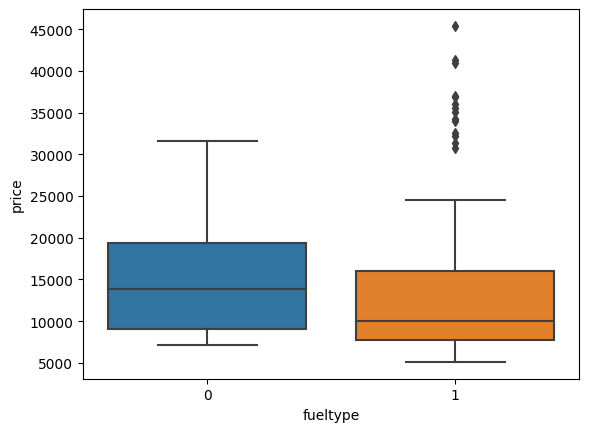

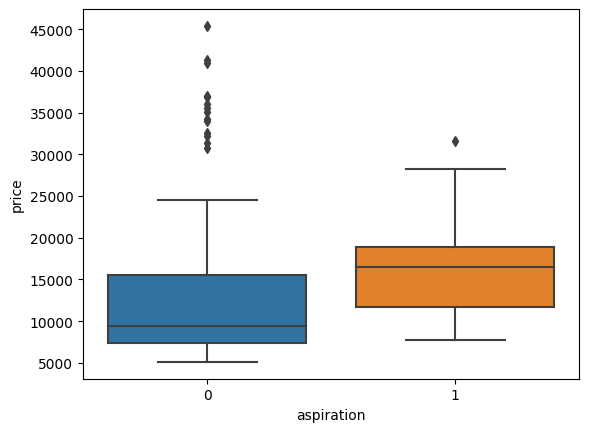

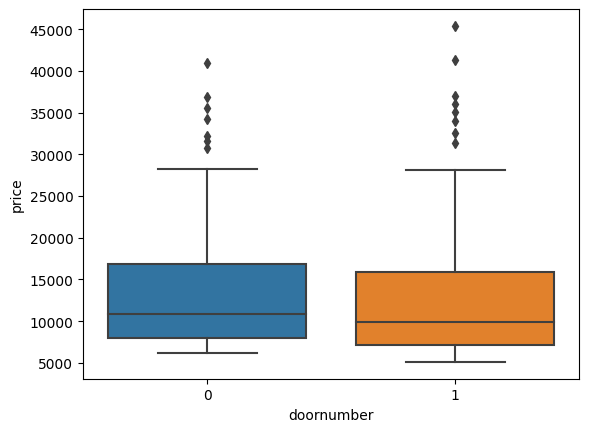

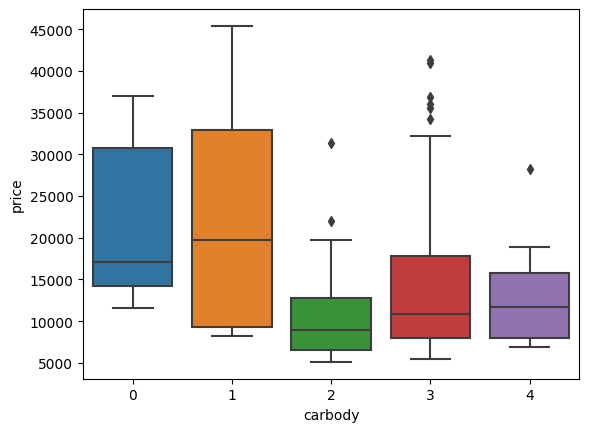

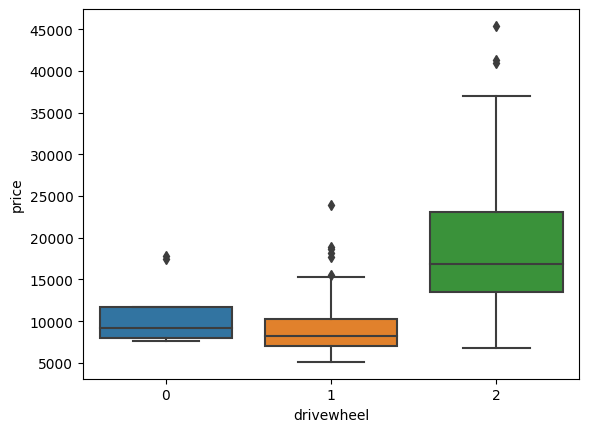

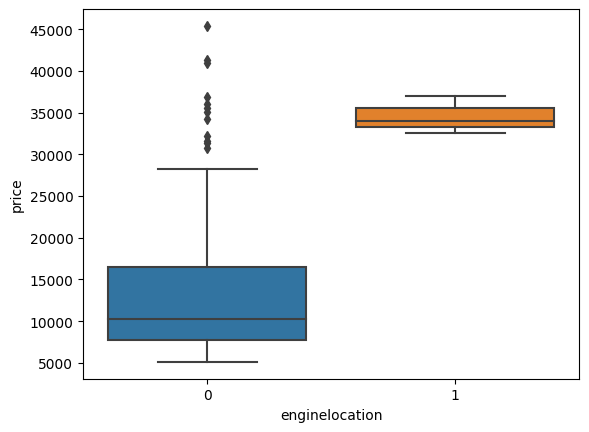

In [472]:
plt.figure()
sns.boxplot(x='fueltype', y='price', data=df)
plt.show()
plt.figure()
sns.boxplot(x='aspiration', y='price', data=df)
plt.show()
plt.figure()
sns.boxplot(x='doornumber', y='price', data=df)
plt.show()
plt.figure()
sns.boxplot(x='carbody', y='price', data=df)
plt.show()
plt.figure()
sns.boxplot(x='drivewheel', y='price', data=df)
plt.show()
plt.figure()
sns.boxplot(x='enginelocation', y='price', data=df)
plt.show()

## Splitting the dataset into train and test
## Using only relevant columns to train the dataset

In [473]:
X = df.drop(columns=['price','symboling','aspiration','doornumber','carbody','cylindernumber','fueltype'])
Y = df[['price']]

## Data is split in the ratio 7:3

In [474]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

## Using cross validation score with different algorithms

In [475]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [476]:
linear=cross_val_score(LinearRegression(), X_test, Y_test,cv=9)
np.average(linear)

0.8046119446129482

In [477]:
ridge=cross_val_score(Ridge(), X_test, Y_test,cv=9)
np.average(ridge)

0.794888761342746

In [478]:
lasso=cross_val_score(Lasso(), X_test, Y_test,cv=9)
np.average(lasso)

0.8049058657242726

## As it is clear from above that lasso algorithm has the highest score 
### So we will be using that for training our model

In [482]:
finalmodel=Lasso()
finalmodel.fit(X_test,Y_test)

Lasso()

In [484]:
finalmodel.score(X_test, Y_test)

0.94473882423225

# We got accuracy of 94%